# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>Last Edit:</b> 9/27/2016

Section 0: Preparing data <br>
Section 1: Seasonal?

##  Section 0: Preparing data

In [24]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

Loading required package: fitdistrplus
Loading required package: MASS
Loading required package: survival
Loading required package: caTools
Loading required package: repr
Loading required package: IRdisplay


In [5]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [6]:
data = read.csv(file = "data/GREELEY_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [7]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 51

Check number of years in the data set.

In [8]:
data$YEAR[nrow(data)]-firstYear

[1] 121

In [9]:
table(data$MONTH)


  1   2   3   4   5   6   7   8   9  10  11  12 
113 114 117 115 115 115 117 115 115 117 116 116 

In [10]:
fillInMonths = c(8,4,4,9,seq(1,12,1),1,12,9,seq(1,12,1),seq(1,12,1),seq(1,12,1),seq(1,12,1),2,5,1,6,1,2,11,6,1,2,5,8)

In [11]:
fillInYears = c(1897,1898,1905,1906,rep(1907,12),1908,1912,1913,rep(1914,12),rep(1915,12),rep(1916,12),rep(1917,12),
                1918,1919,1920,1920,1922,1923,1927,1928,1948,1948,1955,1957)

In [12]:
for(i in 1:length(fillInMonths)){
    data=rbind(data,c("GHCND:USC00053546", "GREELEY CO US",fillInYears[i],fillInMonths[i],31,-999))
}

In [13]:
data=data[order(data$YEAR,as.integer(data$MONTH)),]

In [14]:
data$Max.PRCP.=as.integer(data$Max.PRCP.)

In [15]:
data[data==-999] = NA

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [90]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((firstYear + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

## Section 1: Seasonal?

In [91]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

In [92]:
cp=239
cpYear = 1983

In [93]:
smooth = runmean(data$Max.PRCP., 120)
smoothTS = ts(smooth, start=firstYear, freq=12)

In [94]:
data["box"] = as.numeric(data$YEAR>=cpYear)

In [95]:
indicator = c(rep(0,cp),rep(1,(nrow(data)-cp)))

In [96]:
meansBox = as.data.frame(cbind(smoothTS,indicator))

In [97]:
meansBoxSea = as.data.frame(cbind(smoothTS, rep(c(1,2,3,4,5,6,7,8,9,10,11,12),length(smoothTS)/12),indicator))

In [98]:
names(meansBoxSea) = c("precipitation","month","indicator")

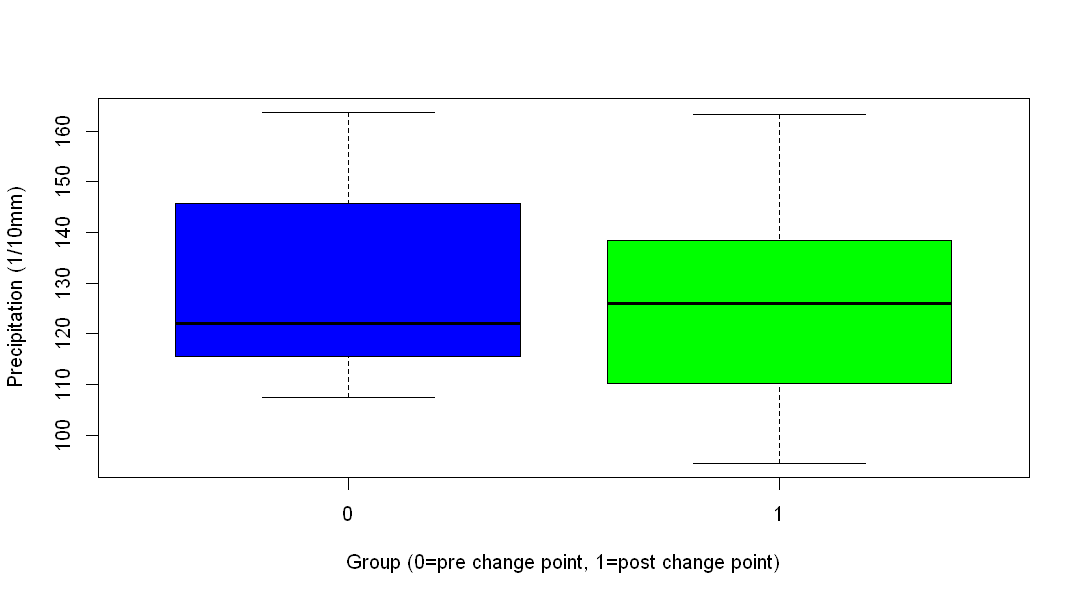

In [99]:
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

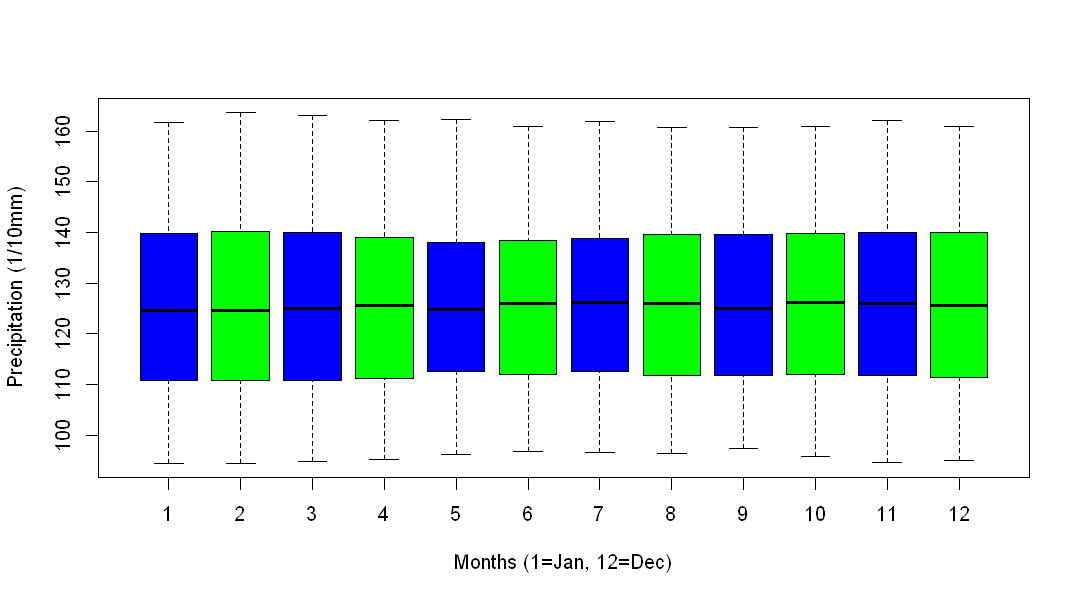

In [100]:
boxplot(meansBoxSea$precipitation ~ meansBoxSea$month, xlab = "Months (1=Jan, 12=Dec)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

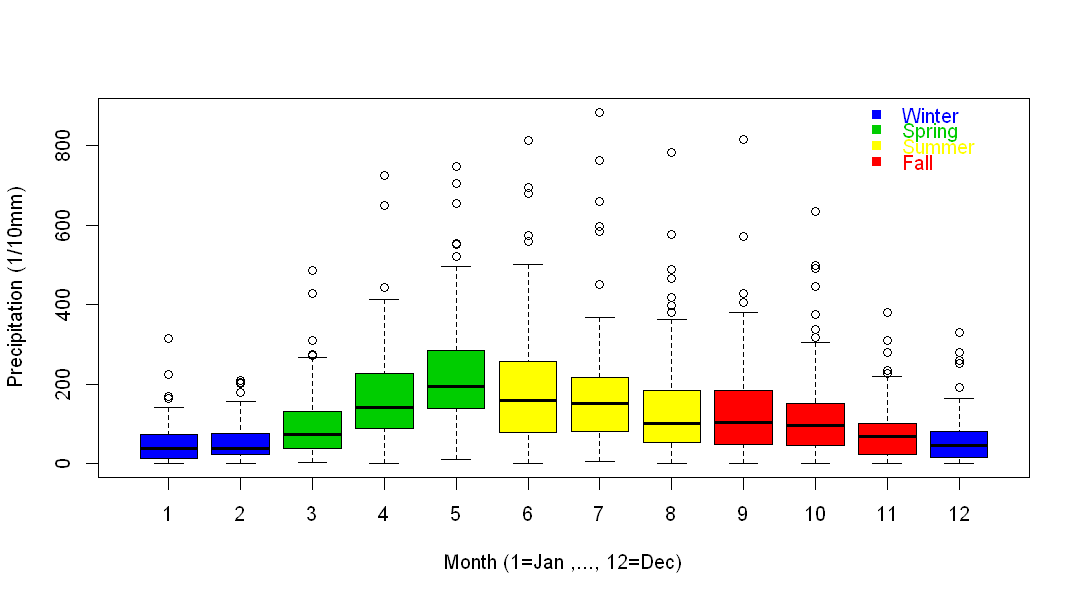

In [101]:
boxplot(data$Max.PRCP. ~ meansBoxSea$month, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,3,3,3,7,7,7,2,2,2,4), ylab = "Precipitation (1/10mm)")
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)

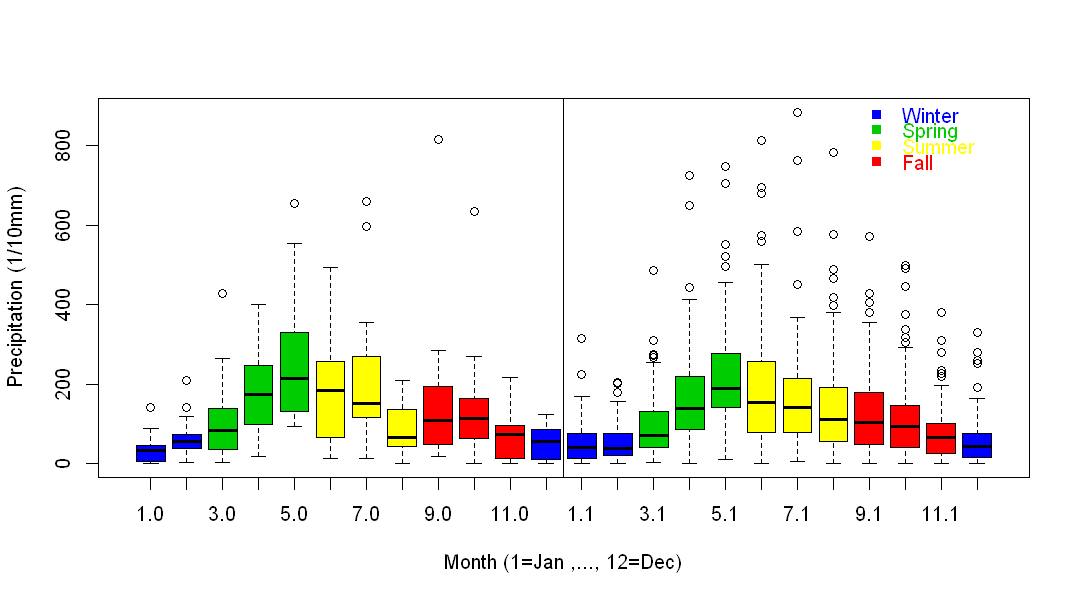

In [102]:
boxplot(data$Max.PRCP. ~ meansBoxSea$month + meansBoxSea$indicator, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,3,3,3,7,7,7,2,2,2,4), ylab = "Precipitation (1/10mm)"
        #xaxt="n"
       )
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)
abline(v=12.5)

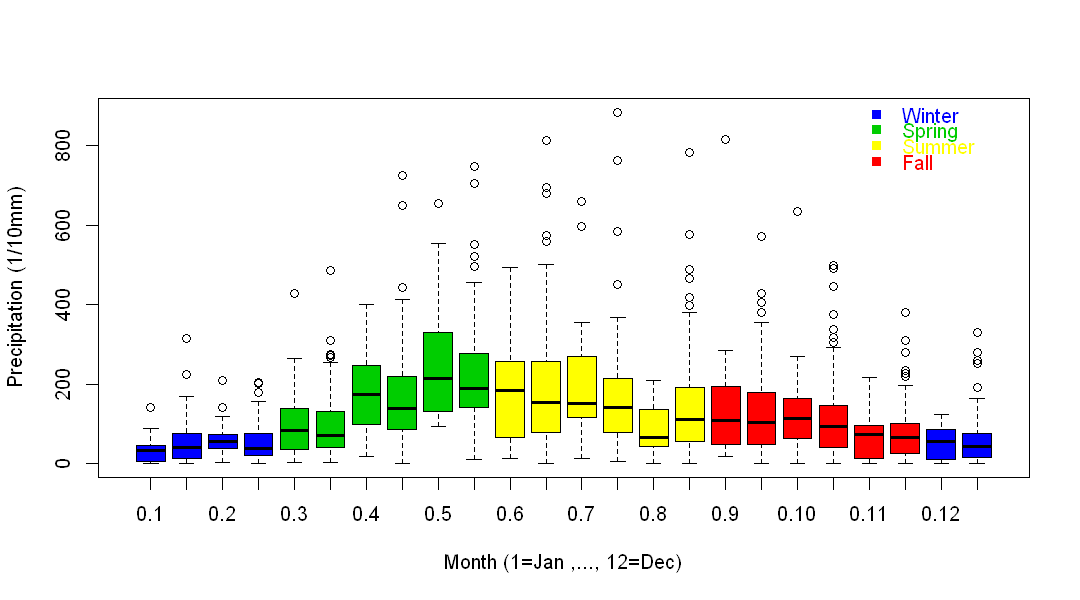

In [103]:
boxplot(data$Max.PRCP. ~  meansBoxSea$indicator+ meansBoxSea$month, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,4,4,3,3,3,3,3,3,7,7,7,7,7,7,2,2,2,2,2,2,4,4), ylab = "Precipitation (1/10mm)")
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
       text.col = c(4,3,7,2), pt.bg = c(4,3,7,2))

Warning message:
: Removed 94 rows containing non-finite values (stat_boxplot).

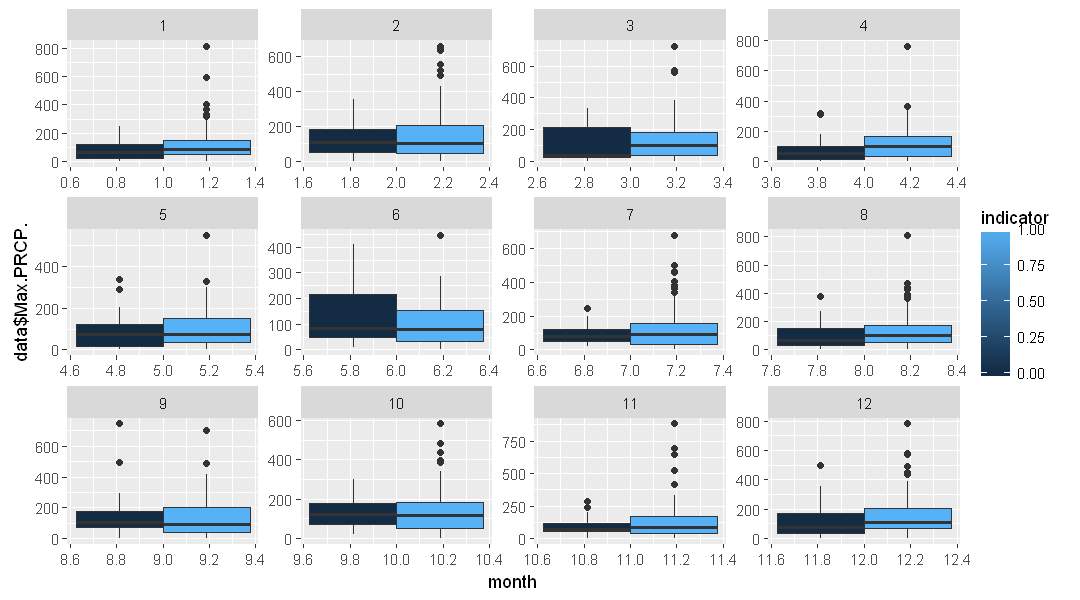

In [104]:
p <- ggplot(data = meansBoxSea, aes(x=month, y=data$Max.PRCP.)) + 
             geom_boxplot(aes(group=indicator, fill=indicator))
p + facet_wrap( ~ month, scales="free")

In [105]:
monthly = NULL
for(i in 1:12){
    monthly = cbind(monthly,data[which(data$MONTH==i),"Max.PRCP."])
}
monthlyDF = as.data.frame(monthly)
monthNames = c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec")
colnames(monthlyDF) = monthNames

In [106]:
require(ggplot2)

In [107]:
x = seq(1:nrow(data))

In [108]:
smoothJan = ts(monthlyDF$jan,start=firstYear)
smoothFeb = ts(monthlyDF$feb,start=firstYear)
smoothMar = ts(monthlyDF$mar,start=firstYear)
smoothApr = ts(monthlyDF$apr,start=firstYear)

smoothMay = ts(monthlyDF$may,start=firstYear)
smoothJune = ts(monthlyDF$june,start=firstYear)
smoothJuly = ts(monthlyDF$july,start=firstYear)
smoothAug = ts(monthlyDF$aug,start=firstYear)

smoothSept = ts(monthlyDF$sept,start=firstYear)
smoothOct = ts(monthlyDF$oct,start=firstYear)
smoothNov = ts(monthlyDF$nov,start=firstYear)
smoothDec = ts(monthlyDF$dec,start=firstYear)

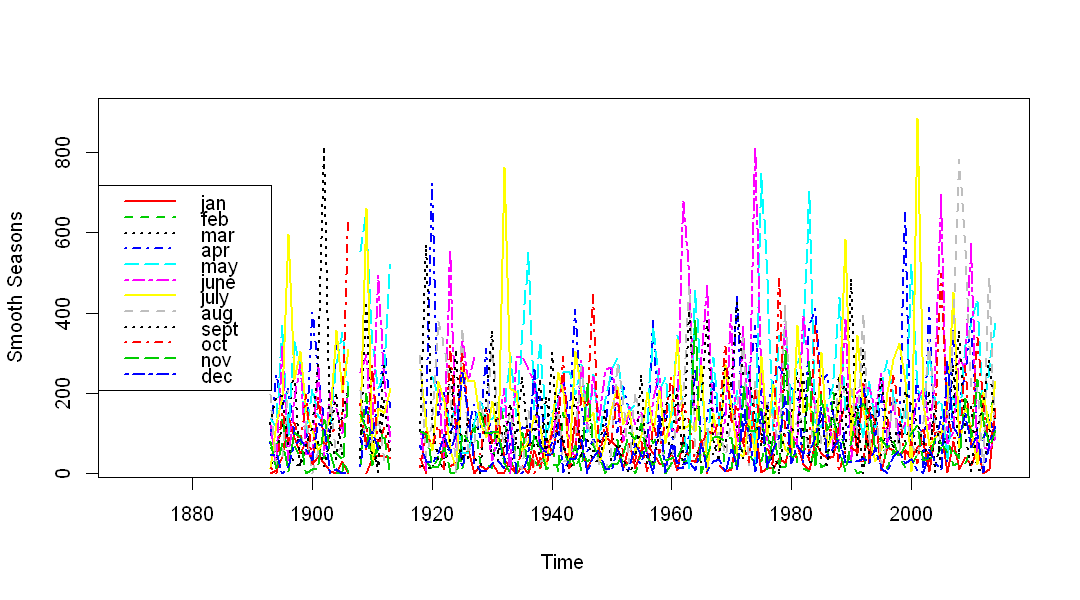

In [109]:
plot(smoothJan,col=2,ylim=c(25,900),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=2)
lines(smoothMar, lwd=2, lty=3)
lines(smoothApr,col=4, lwd=2, lty=4)

lines(smoothMay,col=5, lwd=2, lty=5)
lines(smoothJune,col=6, lwd=2, lty=6)
lines(smoothJuly,col=7, lwd=2, lty=7)
lines(smoothAug,col=8, lwd=2, lty=8)

lines(smoothSept,col=9, lwd=2, lty=9)
lines(smoothOct,col=10, lwd=2, lty=10)
lines(smoothNov,col=11, lwd=2, lty=11)
lines(smoothDec,col=12, lwd=2, lty=12)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,2,3,4,5,6,7,8,9,10,11,12),inset=c(0,0),
      lwd=c(rep(2,12)))

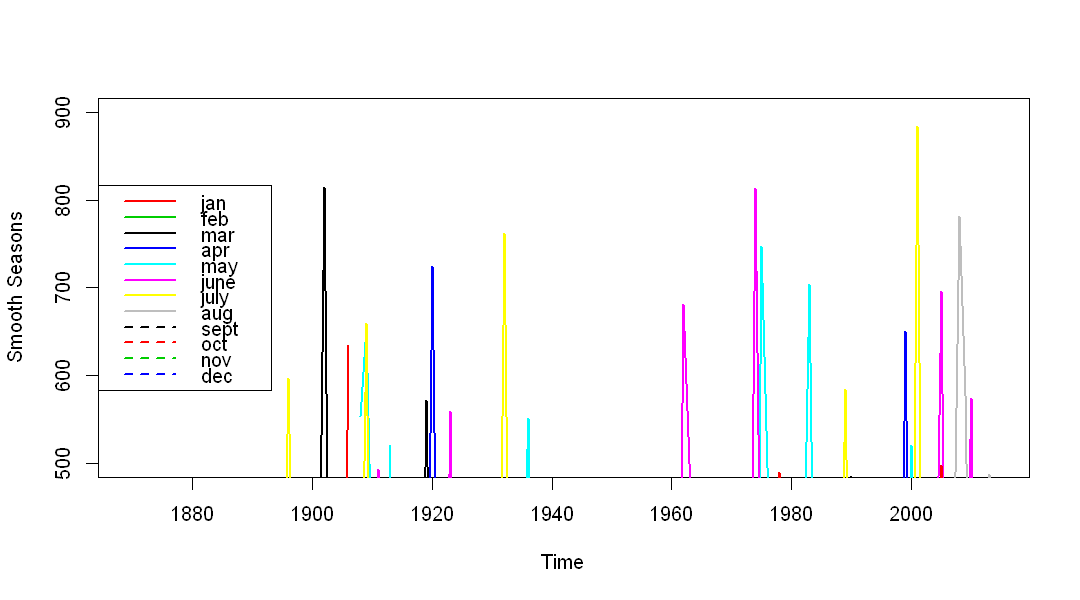

In [110]:
plot(smoothJan,col=2,ylim=c(500,900),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=1)
lines(smoothMar, lwd=2, lty=1)
lines(smoothApr,col=4, lwd=2, lty=1)

lines(smoothMay,col=5, lwd=2, lty=1)
lines(smoothJune,col=6, lwd=2, lty=1)
lines(smoothJuly,col=7, lwd=2, lty=1)
lines(smoothAug,col=8, lwd=2, lty=1)

lines(smoothSept,col=9, lwd=2, lty=1)
lines(smoothOct,col=10, lwd=2, lty=1)
lines(smoothNov,col=11, lwd=2, lty=1)
lines(smoothDec,col=12, lwd=2, lty=1)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=(c(rep(1,8),2,2,2,2)),inset=c(0,0),
      lwd=c(rep(2,12)))

In [111]:
smoothJan = ts(runmean(monthlyDF$jan,10),start=1898)
smoothFeb = ts(runmean(monthlyDF$feb,10),start=1898)
smoothMar = ts(runmean(monthlyDF$mar,10),start=1898)
smoothApr = ts(runmean(monthlyDF$apr,10),start=1898)

smoothMay = ts(runmean(monthlyDF$may,10),start=1898)
smoothJune = ts(runmean(monthlyDF$june,10),start=1898)
smoothJuly = ts(runmean(monthlyDF$july,10),start=1898)
smoothAug = ts(runmean(monthlyDF$aug,10),start=1898)

smoothSept = ts(runmean(monthlyDF$sept,10),start=1898)
smoothOct = ts(runmean(monthlyDF$oct,10),start=1898)
smoothNov = ts(runmean(monthlyDF$nov,10),start=1898)
smoothDec = ts(runmean(monthlyDF$dec,10),start=1898)

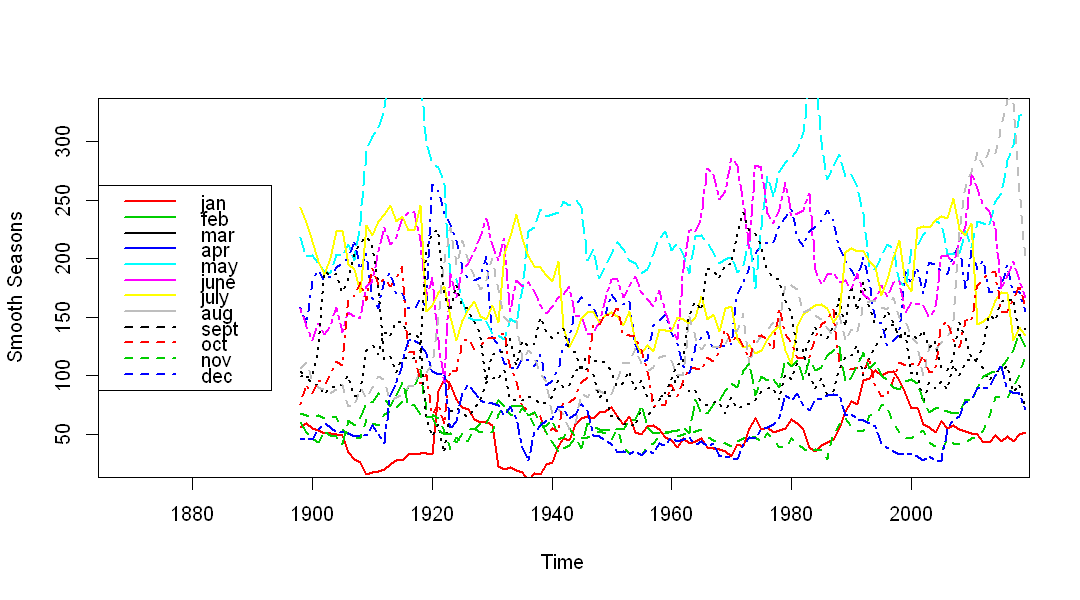

In [112]:
plot(smoothJan,col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=2)
lines(smoothMar, lwd=2, lty=3)
lines(smoothApr,col=4, lwd=2, lty=4)

lines(smoothMay,col=5, lwd=2, lty=5)
lines(smoothJune,col=6, lwd=2, lty=6)
lines(smoothJuly,col=7, lwd=2, lty=7)
lines(smoothAug,col=8, lwd=2, lty=8)

lines(smoothSept,col=9, lwd=2, lty=9)
lines(smoothOct,col=10, lwd=2, lty=10)
lines(smoothNov,col=11, lwd=2, lty=11)
lines(smoothDec,col=12, lwd=2, lty=12)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)))

In [114]:
smoothJan40 = ts(runmean(monthlyDF$jan,40),start=firstYear)
smoothFeb40 = ts(runmean(monthlyDF$feb,40),start=firstYear)
smoothMar40 = ts(runmean(monthlyDF$mar,40),start=firstYear)
smoothApr40 = ts(runmean(monthlyDF$apr,40),start=firstYear)

smoothMay40 = ts(runmean(monthlyDF$may,40),start=firstYear)
smoothJune40 = ts(runmean(monthlyDF$june,40),start=firstYear)
smoothJuly40 = ts(runmean(monthlyDF$july,40),start=firstYear)
smoothAug40 = ts(runmean(monthlyDF$aug,40),start=firstYear)

smoothSept40 = ts(runmean(monthlyDF$sept,40),start=firstYear)
smoothOct40 = ts(runmean(monthlyDF$oct,40),start=firstYear)
smoothNov40 = ts(runmean(monthlyDF$nov,40),start=firstYear)
smoothDec40 = ts(runmean(monthlyDF$dec,40),start=firstYear)

In [115]:
options(repr.plot.width=7, repr.plot.height=6) #reduces the plot sizes

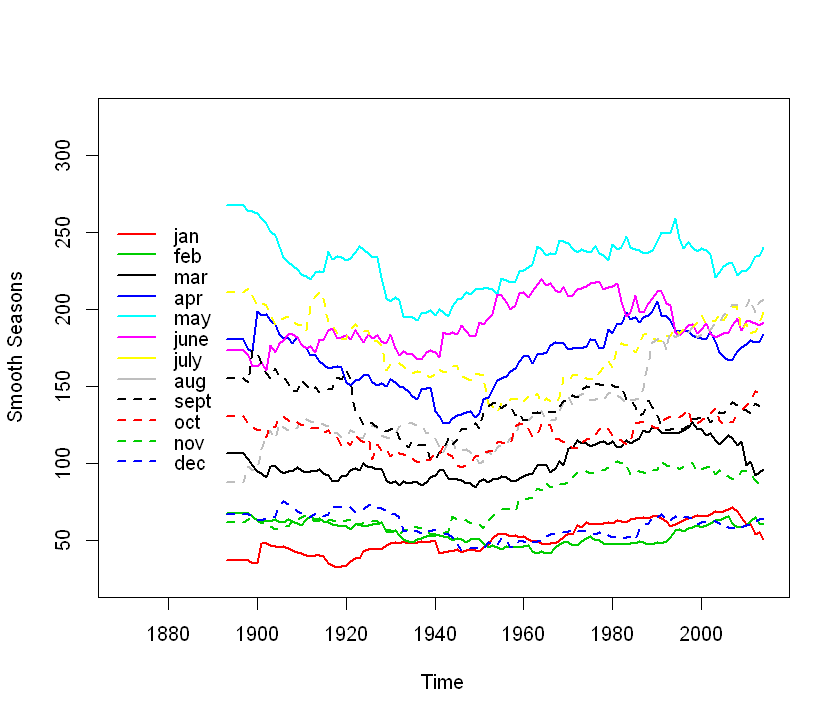

In [116]:
plot(smoothJan40,col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb40,col=3, lwd=2, lty=1)
lines(smoothMar40, lwd=2, lty=1)
lines(smoothApr40,col=4, lwd=2, lty=1)

lines(smoothMay40,col=5, lwd=2, lty=1)
lines(smoothJune40,col=6, lwd=2, lty=1)
lines(smoothJuly40,col=7, lwd=2, lty=2)
lines(smoothAug40,col=8, lwd=2, lty=2)

lines(smoothSept40,col=9, lwd=2, lty=2)
lines(smoothOct40,col=10, lwd=2, lty=2)
lines(smoothNov40,col=11, lwd=2, lty=2)
lines(smoothDec40,col=12, lwd=2, lty=2)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)), bty="n")

In [117]:
options(repr.plot.width=8, repr.plot.height=20) #reduces the plot sizes

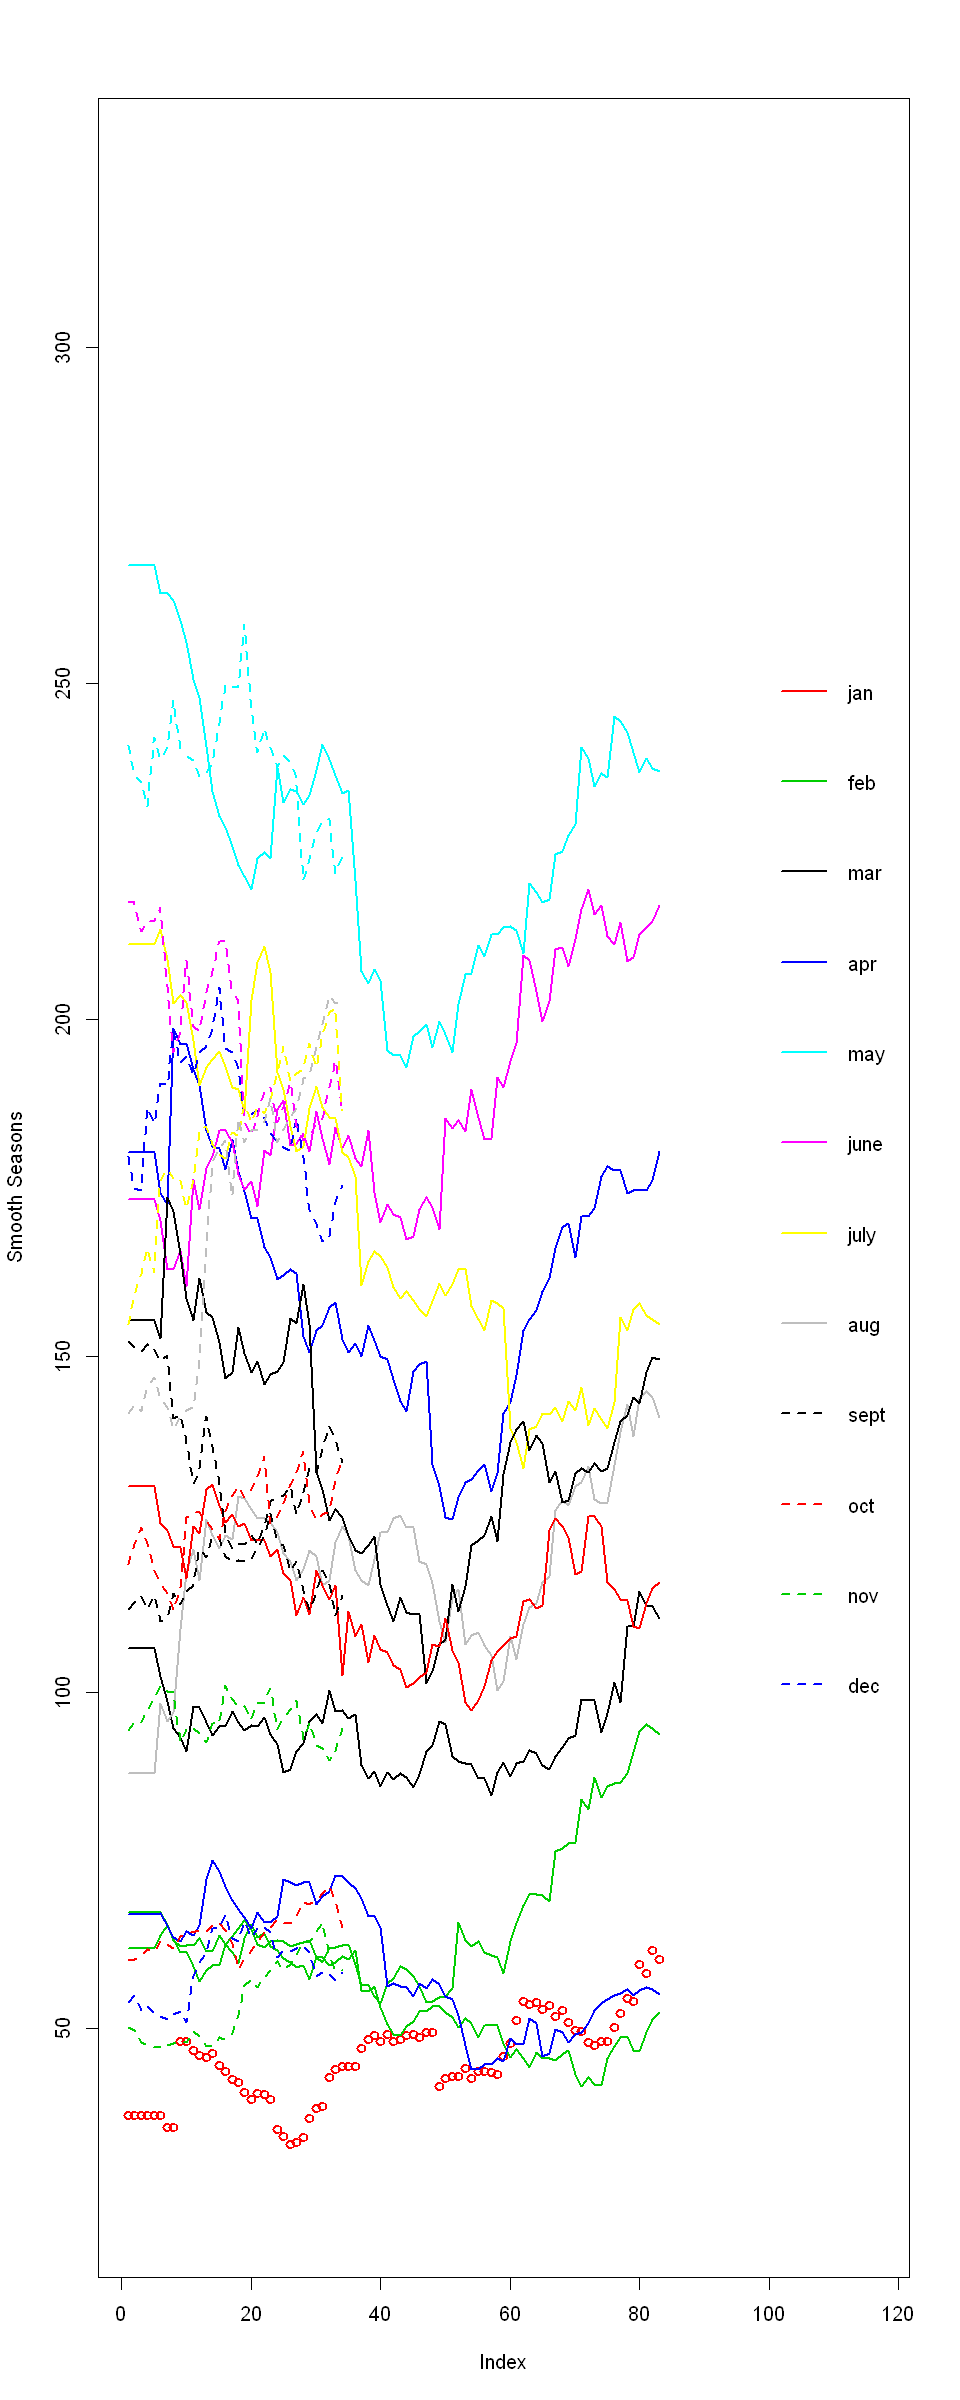

In [118]:
plot(smoothJan40[1:83],col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1, xlim=c(1,117))
lines(smoothFeb40[1:83],col=3, lwd=2, lty=1)
lines(smoothMar40[1:83], lwd=2, lty=1)
lines(smoothApr40[1:83],col=4, lwd=2, lty=1)

lines(smoothMay40[1:83],col=5, lwd=2, lty=1)
lines(smoothJune40[1:83],col=6, lwd=2, lty=1)
lines(smoothJuly40[1:83],col=7, lwd=2, lty=1)
lines(smoothAug40[1:83],col=8, lwd=2, lty=1)

lines(smoothSept40[1:83],col=9, lwd=2, lty=1)
lines(smoothOct40[1:83],col=10, lwd=2, lty=1)
lines(smoothNov40[1:83],col=11, lwd=2, lty=1)
lines(smoothDec40[1:83],col=12, lwd=2, lty=1)

lines(smoothJan40[84:117],col=2,lwd=2, lty=2)
lines(smoothFeb40[84:117],col=3, lwd=2, lty=2)
lines(smoothMar40[84:117], lwd=2, lty=2)
lines(smoothApr40[84:117],col=4, lwd=2, lty=2)

lines(smoothMay40[84:117],col=5, lwd=2, lty=2)
lines(smoothJune40[84:117],col=6, lwd=2, lty=2)
lines(smoothJuly40[84:117],col=7, lwd=2, lty=2)
lines(smoothAug40[84:117],col=8, lwd=2, lty=2)

lines(smoothSept40[84:117],col=9, lwd=2, lty=2)
lines(smoothOct40[84:117],col=10, lwd=2, lty=2)
lines(smoothNov40[84:117],col=11, lwd=2, lty=2)
lines(smoothDec40[84:117],col=12, lwd=2, lty=2)

legend("right",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)), bty="n")

In [119]:
tester = NULL
tester = c(smoothJan40,smoothFeb40,smoothMar40,smoothApr40,smoothMay40,smoothJune40,smoothJuly40,smoothAug40,
           smoothSept40,smoothOct40,smoothNov40,smoothDec40)

In [120]:
monthsTest = NULL
for(i in 1:12){
    monthsTest = c(monthsTest,rep(i,119))
}

In [121]:
monthsTest2 = NULL
for(month in monthNames){
    monthsTest2 = c(monthsTest2,rep(month,119))
}

In [122]:
counter = NULL
for(i in 1:12){
    counter = c(counter,rep(0,83),rep(1,(119-83)))
}

In [123]:
counter2 = NULL
for(i in 1:12){
    counter2 = c(counter2,rep("BeforeCP",83),rep("PostCP",(119-83)))
}

In [124]:
2014-116

[1] 1898

In [125]:
boxPlotForMonthsData = as.data.frame(cbind(tester,monthsTest,counter))

Warning message:
In cbind(tester, monthsTest, counter): number of rows of result is not a multiple of vector length (arg 2)

In [126]:
names(boxPlotForMonthsData) = c("smoothPrecip","months","counter")

In [127]:
head(boxPlotForMonthsData)

smoothPrecip,months,counter
37.10526,1,0
37.10526,1,0
37.10526,1,0
37.10526,1,0
37.10526,1,0
37.15000,1,0


In [128]:
options(repr.plot.width=9, repr.plot.height=7) #reduces the plot sizes

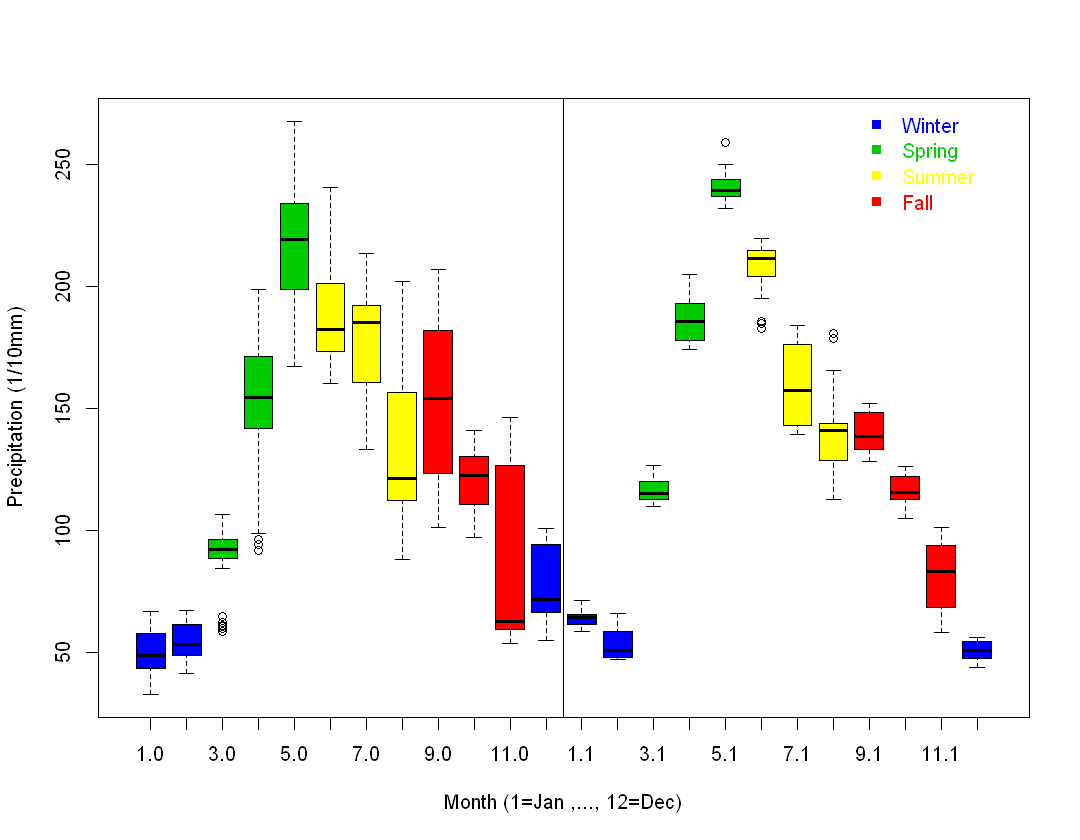

In [129]:
boxplot(boxPlotForMonthsData$smoothPrecip ~ boxPlotForMonthsData$months + boxPlotForMonthsData$counter, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,3,3,3,7,7,7,2,2,2,4), ylab = "Precipitation (1/10mm)", 
        #xaxt="n"
       )
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)
abline(v=12.5)

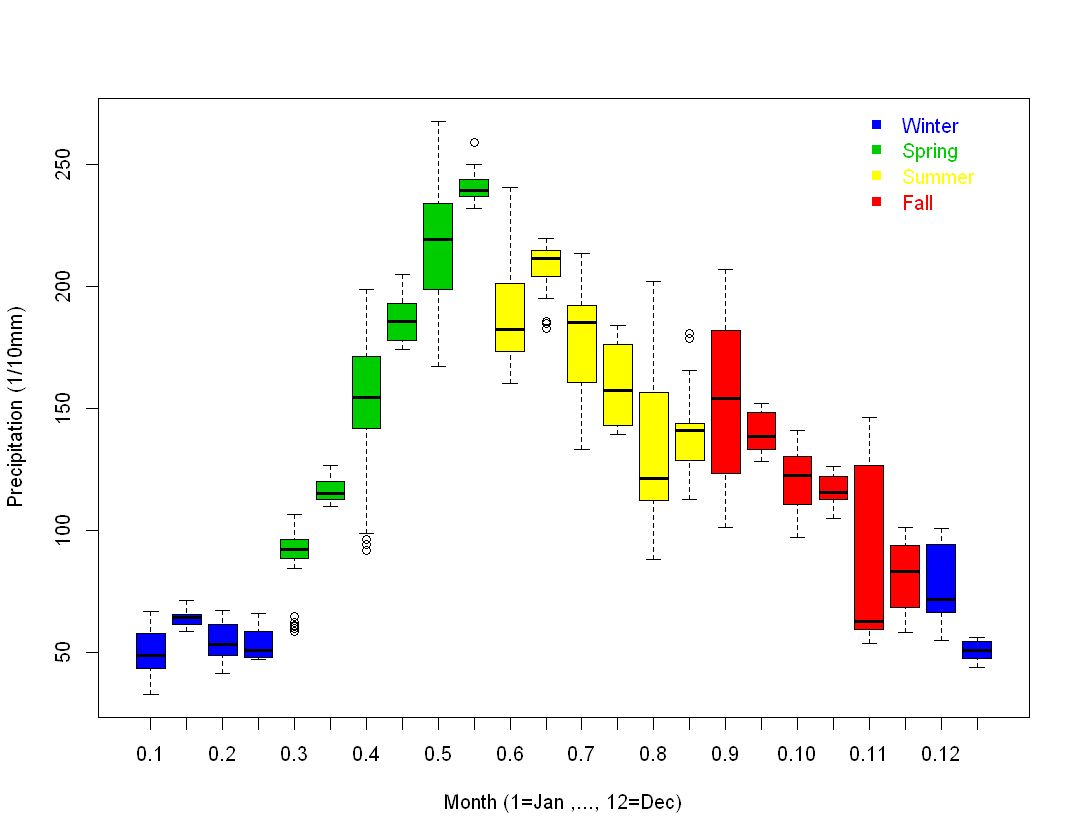

In [130]:
boxplot(boxPlotForMonthsData$smoothPrecip ~  boxPlotForMonthsData$counter+ boxPlotForMonthsData$months, xlab = "Month (1=Jan ,..., 12=Dec)",
       col = c(4,4,4,4,3,3,3,3,3,3,7,7,7,7,7,7,2,2,2,2,2,2,4,4), ylab = "Precipitation (1/10mm)")
legend("topright",c("Winter","Spring","Summer","Fall"),col = c(4,3,7,2),bty="n", pch=c(22,22,22,22),
      text.col = c(4,3,7,2), pt.bg = c(4,3,7,2)
)

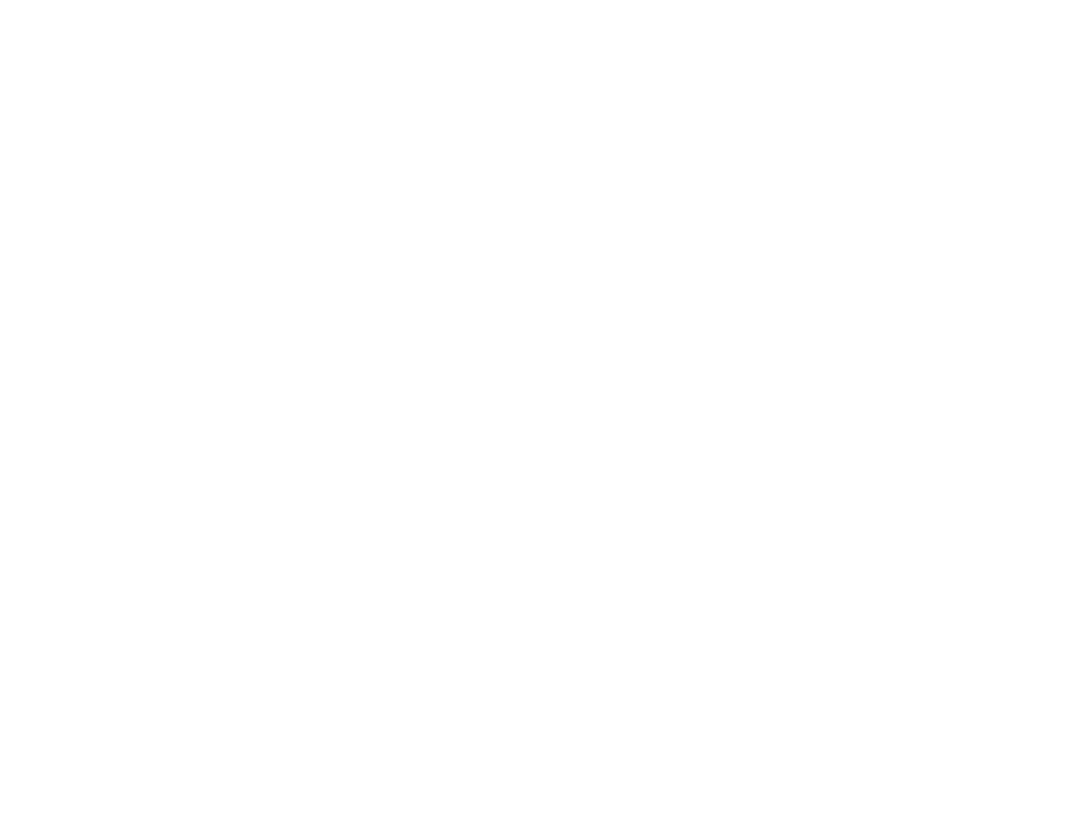

In [131]:
p <- ggplot(data = boxPlotForMonthsData, aes(x=months, y=smoothPrecip)) + 
             geom_boxplot(aes(group=counter2, fill=counter2))
p + facet_wrap( ~ months, scales="free")

In [132]:
options(repr.plot.width=6, repr.plot.height=4) #reduces the plot sizes

In [133]:
smoothJan = ts(monthlyDF$jan,start=firstYear)
smoothFeb = ts(monthlyDF$feb,start=firstYear)
smoothMar = ts(monthlyDF$mar,start=firstYear)
smoothApr = ts(monthlyDF$apr,start=firstYear)

smoothMay = ts(monthlyDF$may,start=firstYear)
smoothJune = ts(monthlyDF$june,start=firstYear)
smoothJuly = ts(monthlyDF$july,start=firstYear)
smoothAug = ts(monthlyDF$aug,start=firstYear)

smoothSept = ts(monthlyDF$sept,start=firstYear)
smoothOct = ts(monthlyDF$oct,start=firstYear)
smoothNov = ts(monthlyDF$nov,start=firstYear)
smoothDec = ts(monthlyDF$dec,start=firstYear)

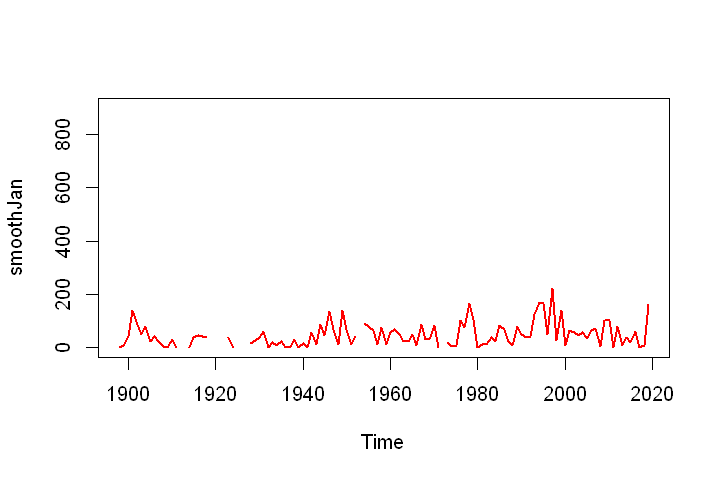

In [134]:
plot(smoothJan, ylim=c(0,900), lwd=2, lty=1, col=2)

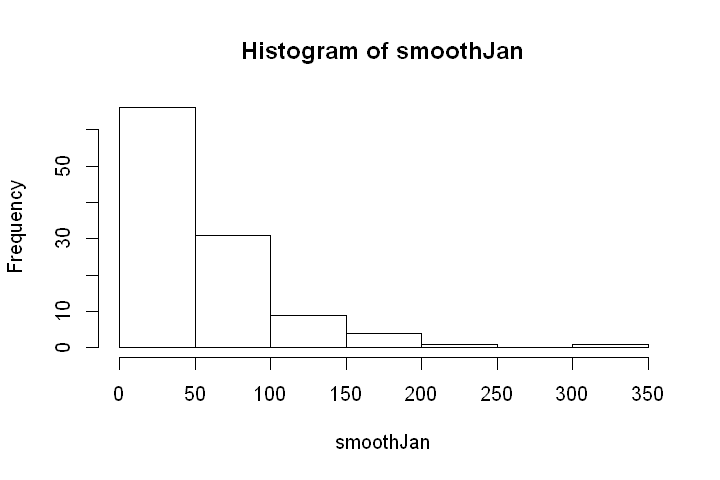

In [135]:
hist(smoothJan,breaks=10)

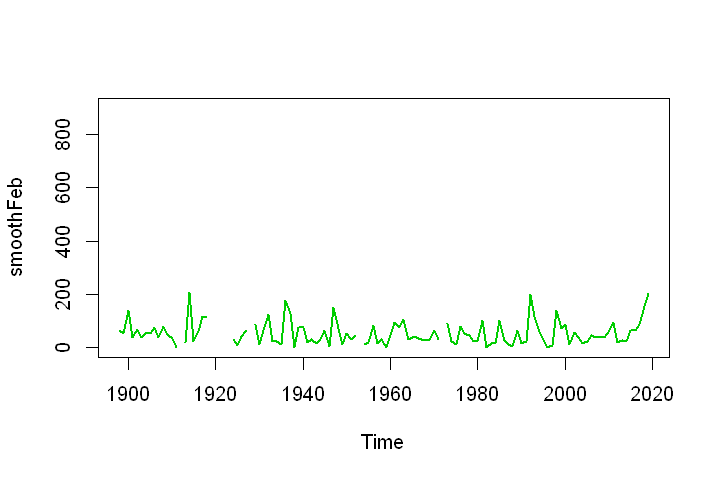

In [136]:
plot(smoothFeb, ylim=c(0,900), lwd=2, lty=1, col=3)

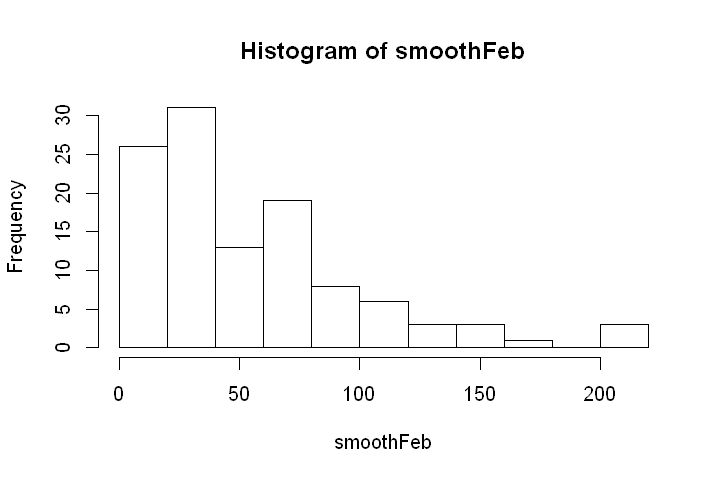

In [137]:
hist(smoothFeb,breaks=10)

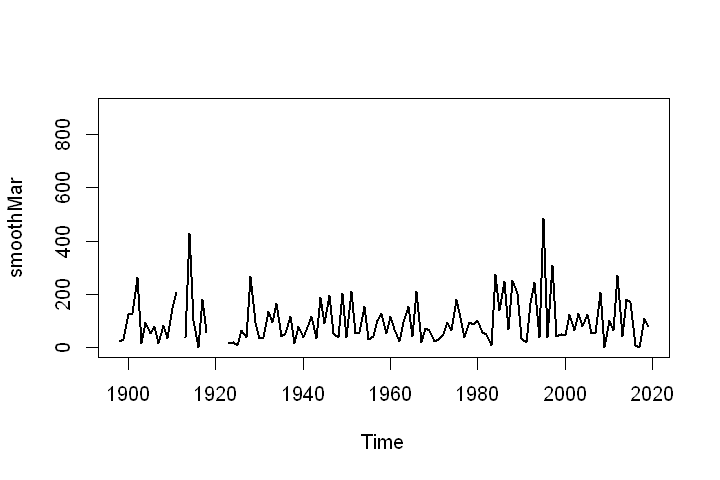

In [138]:
plot(smoothMar, ylim=c(0,900), lwd=2, lty=1, col=1)

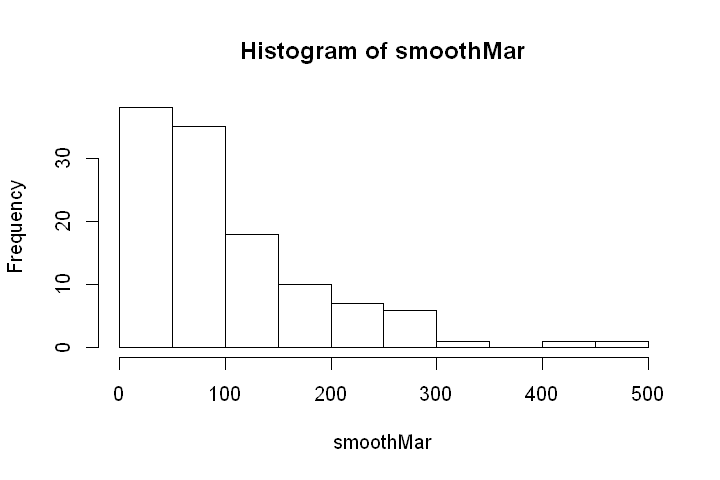

In [139]:
hist(smoothMar,breaks=10)

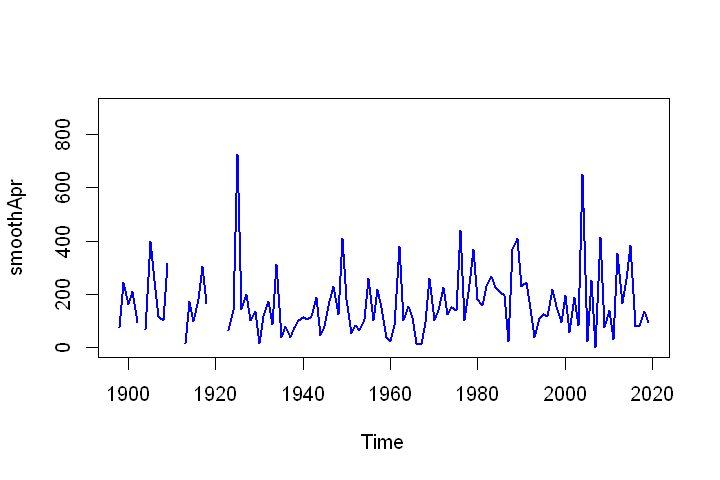

In [140]:
plot(smoothApr, ylim=c(0,900), lwd=2, lty=1, col=4)

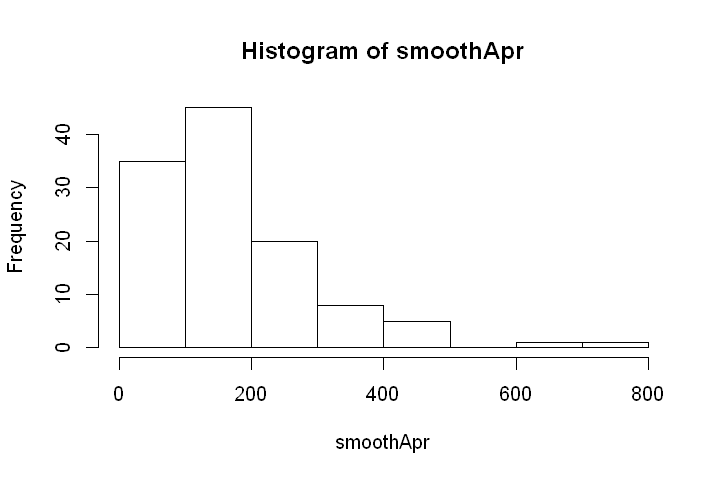

In [141]:
hist(smoothApr,breaks=10)

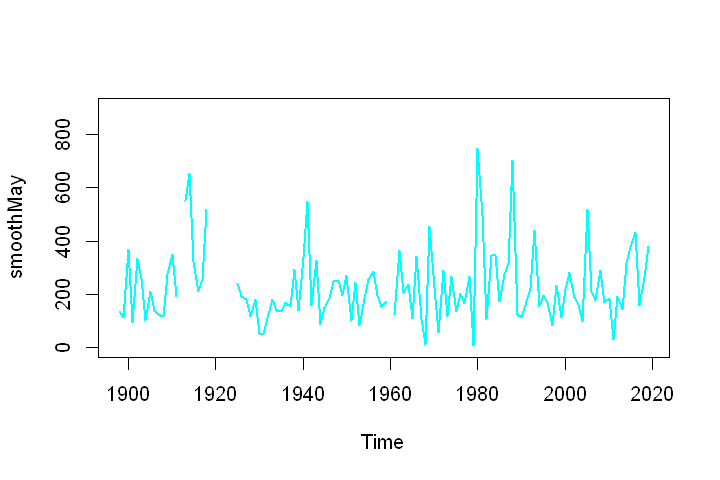

In [142]:
plot(smoothMay, ylim=c(0,900), lwd=2, lty=1, col=5)

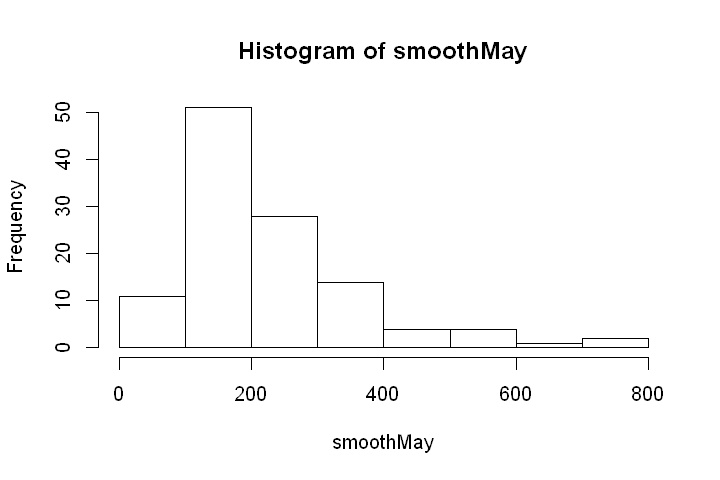

In [143]:
hist(smoothMay,breaks=10)

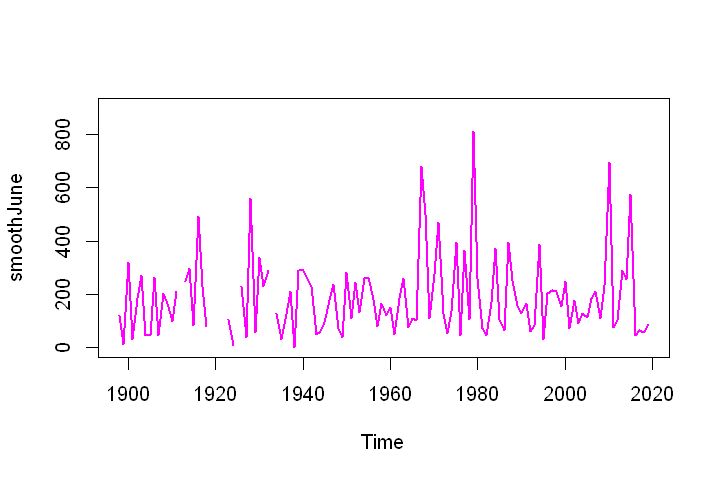

In [144]:
plot(smoothJune, ylim=c(0,900), lwd=2, lty=1, col=6)

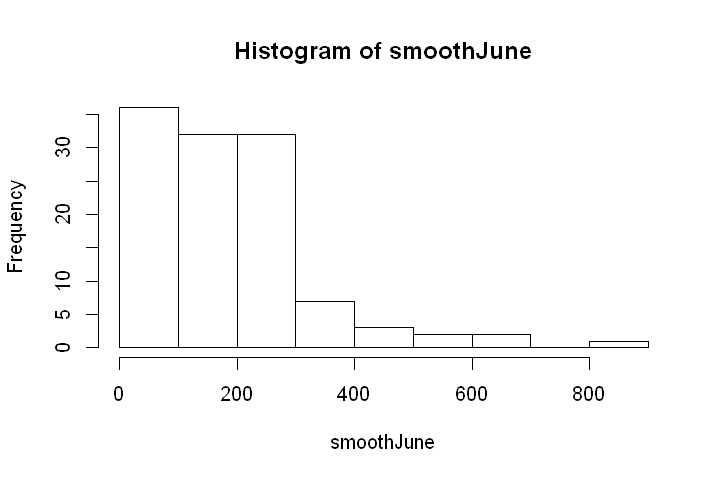

In [145]:
hist(smoothJune,breaks=10)

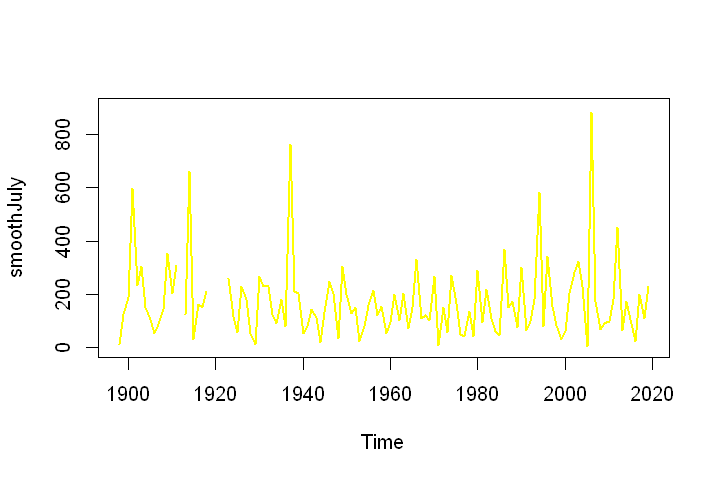

In [146]:
plot(smoothJuly, ylim=c(0,900), lwd=2, lty=1, col=7)

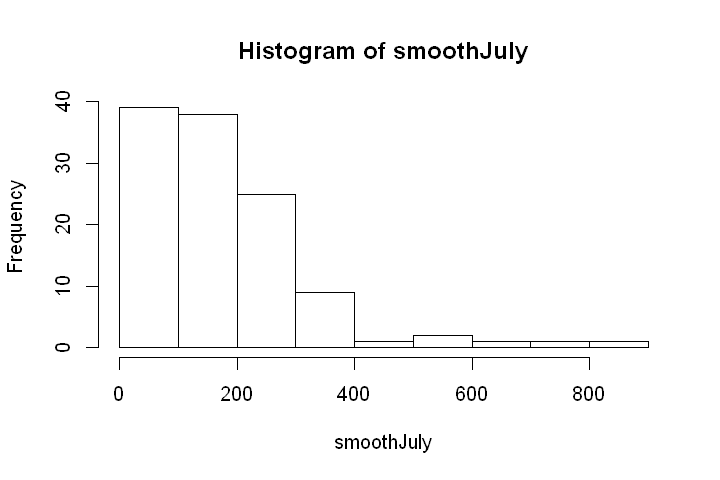

In [147]:
hist(smoothJuly,breaks=10)

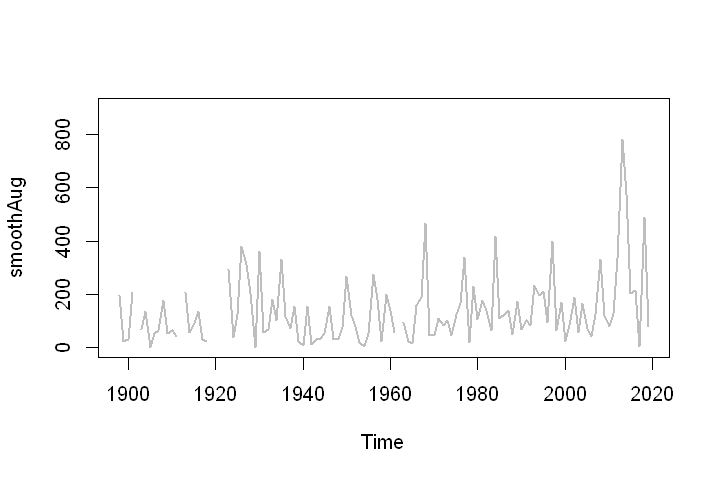

In [79]:
plot(smoothAug, ylim=c(0,900), lwd=2, lty=1, col=8)

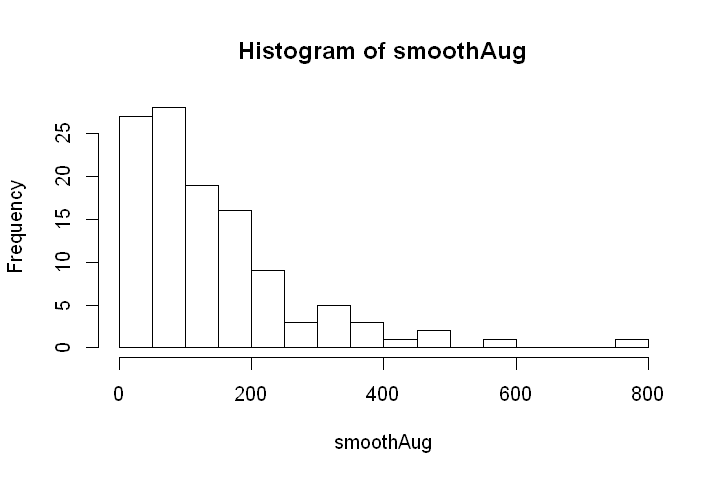

In [80]:
hist(smoothAug,breaks=20)

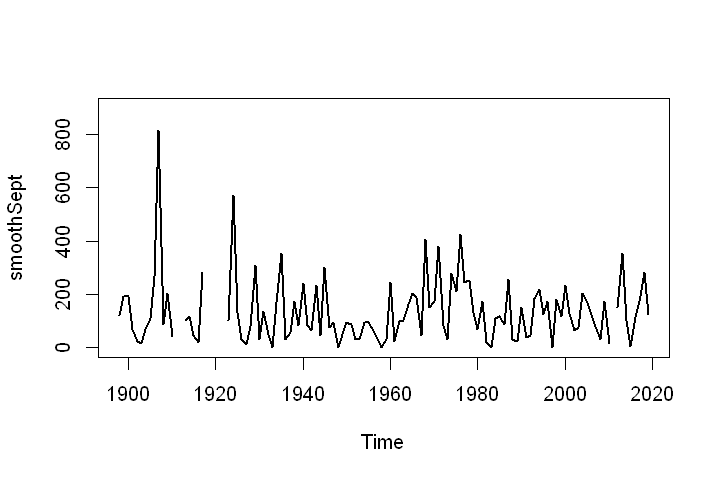

In [81]:
plot(smoothSept, ylim=c(0,900), lwd=2, lty=1, col=9)

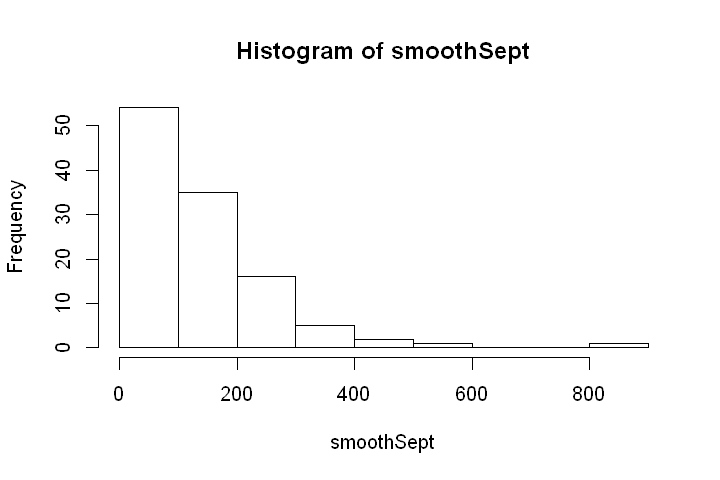

In [82]:
hist(smoothSept,breaks=10)

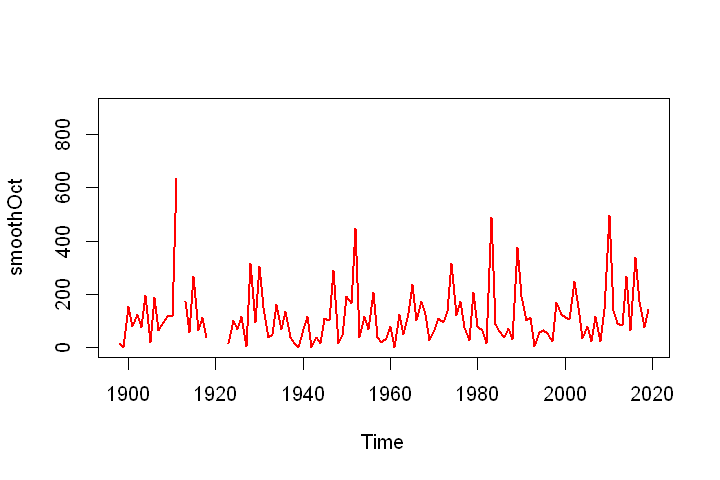

In [83]:
plot(smoothOct, ylim=c(0,900), lwd=2, lty=1, col=10)

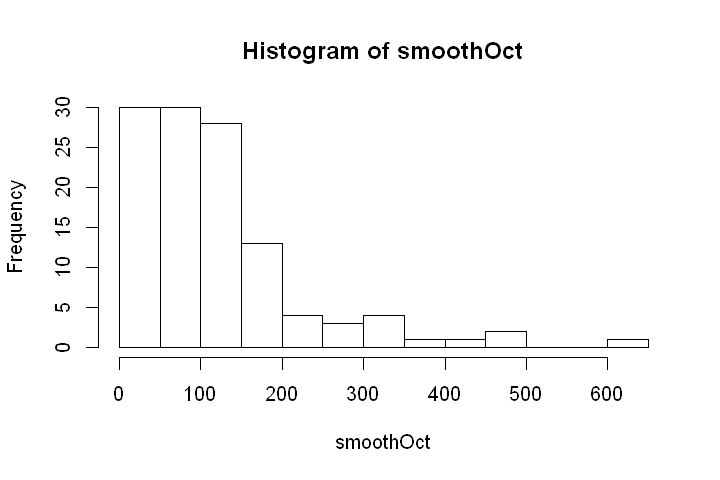

In [84]:
hist(smoothOct,breaks=10)

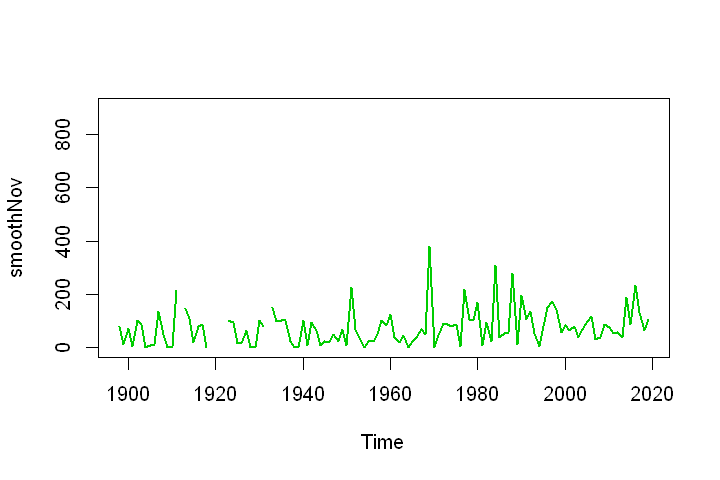

In [85]:
plot(smoothNov, ylim=c(0,900), lwd=2, lty=1, col=11)

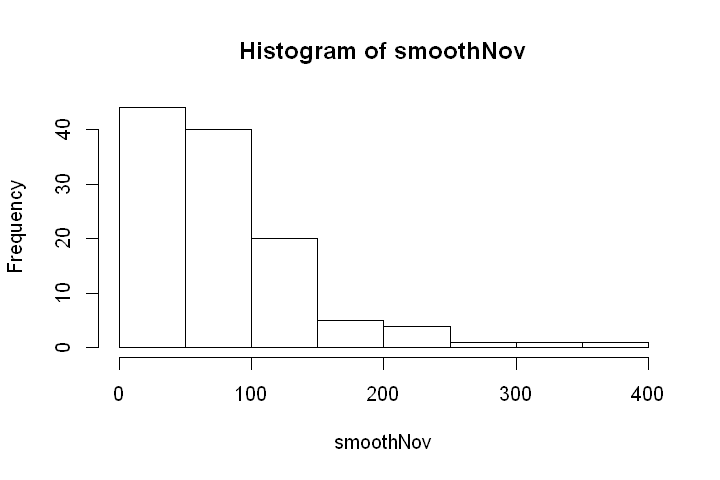

In [86]:
hist(smoothNov,breaks=10)

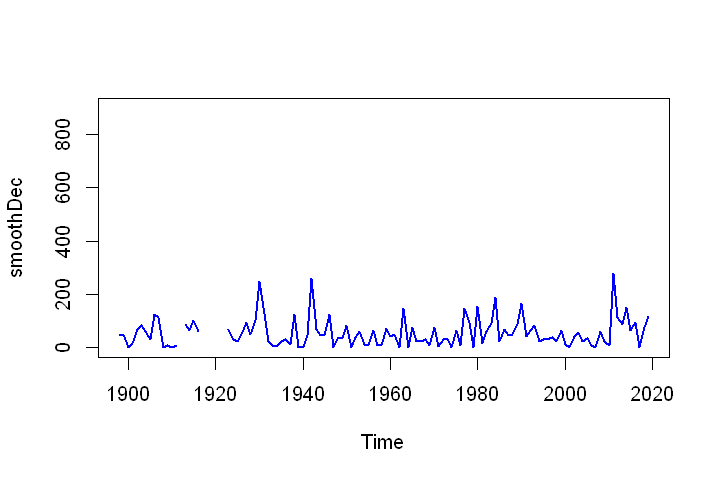

In [87]:
plot(smoothDec, ylim=c(0,900), lwd=2, lty=1, col=12)

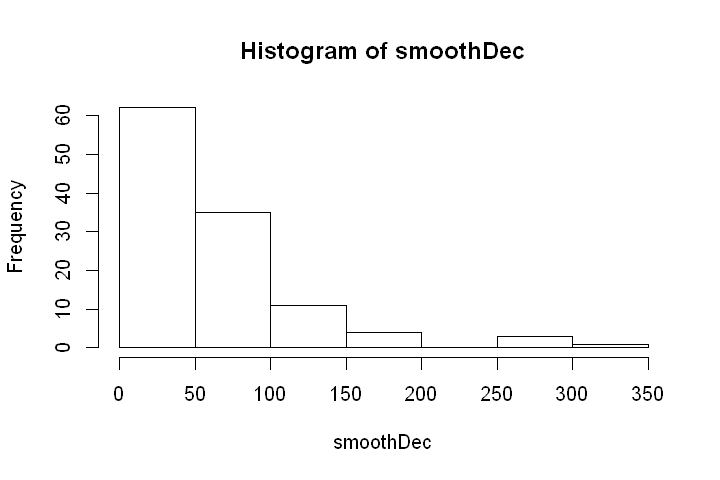

In [88]:
hist(smoothDec,breaks=10)

Flood tolerance, probabilities from selected distributions, bayesian updated (last add)